# Using KNN to classify objects with `sklearn` and `pandas` - solution

---
## 1. Stellar Classification Dataset - SDSS17

In [1]:
# necessary imports for this notebook
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks') # setting style
sns.set_context('talk') # setting context
sns.set_palette('colorblind') # setting palette

### Read in the data and filter it

In [2]:
stellar = pd.read_csv('./data/star_classification.csv')
stellar.head()

# remove all the columns that are not needed
df_stellar = stellar[['obj_ID', 'class', 'u', 'g', 'r', 'i', 'z','redshift']]

# drop any row with negative photometric values
filter = (df_stellar['u'] >= 0) & (df_stellar['g'] >= 0) & (df_stellar['r'] >= 0) & (df_stellar['i'] >= 0) & (df_stellar['z'] >= 0)
df_stellar = df_stellar[filter]

# describe the data again
df_stellar.describe()

,obj_ID,u,g,r,i,z,redshift
count,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,1.237665e+18,22.080679,20.631583,19.645777,19.084865,18.768988,0.576667
std,8.438450e+12,2.251068,2.037384,1.854763,1.757900,1.765982,0.730709
min,1.237646e+18,10.996230,10.498200,9.822070,9.469903,9.612333,-0.009971
25%,1.237659e+18,20.352410,18.965240,18.135795,17.732280,17.460830,0.054522
50%,1.237663e+18,22.179140,21.099930,20.125310,19.405150,19.004600,0.424176
75%,1.237668e+18,23.687480,22.123775,21.044790,20.396510,19.921120,0.704172
max,1.237681e+18,32.781390,31.602240,29.571860,32.141470,29.383740,7.011245


### Plot the data to review it

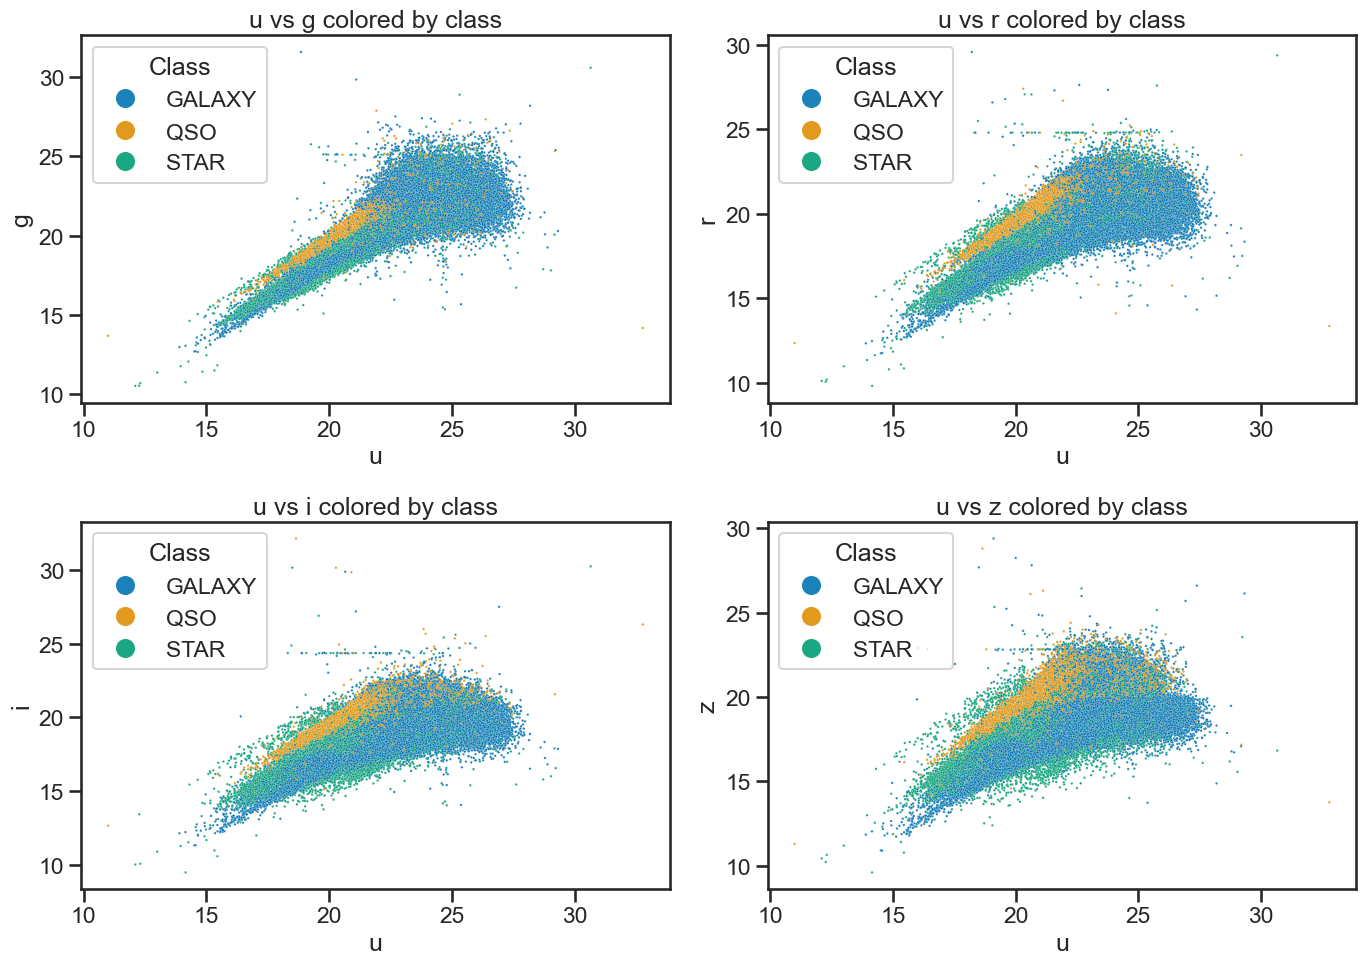

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# u vs g
sns.scatterplot(x='u', y='g', hue='class', data=df_stellar, ax=axes[0, 0], alpha=0.9, s=3)
axes[0, 0].set_xlabel('u')
axes[0, 0].set_ylabel('g')
axes[0, 0].set_title('u vs g colored by class')
axes[0, 0].legend(title='Class', loc='upper left', markerscale=8)

# u vs r
sns.scatterplot(x='u', y='r', hue='class', data=df_stellar, ax=axes[0, 1], alpha=0.9, s=3)
axes[0, 1].set_xlabel('u')
axes[0, 1].set_ylabel('r')
axes[0, 1].set_title('u vs r colored by class')
axes[0, 1].legend(title='Class', loc='upper left', markerscale=8)

# u vs i
sns.scatterplot(x='u', y='i', hue='class', data=df_stellar, ax=axes[1, 0], alpha=0.9, s=3)
axes[1, 0].set_xlabel('u')
axes[1, 0].set_ylabel('i')
axes[1, 0].set_title('u vs i colored by class')
axes[1, 0].legend(title='Class', loc='upper left', markerscale=8)

# u vs z
sns.scatterplot(x='u', y='z', hue='class', data=df_stellar, ax=axes[1, 1], alpha=0.9, s=3)
axes[1, 1].set_xlabel('u')
axes[1, 1].set_ylabel('z')
axes[1, 1].set_title('u vs z colored by class')
axes[1, 1].legend(title='Class', loc='upper left', markerscale=8)


plt.tight_layout()
plt.show()

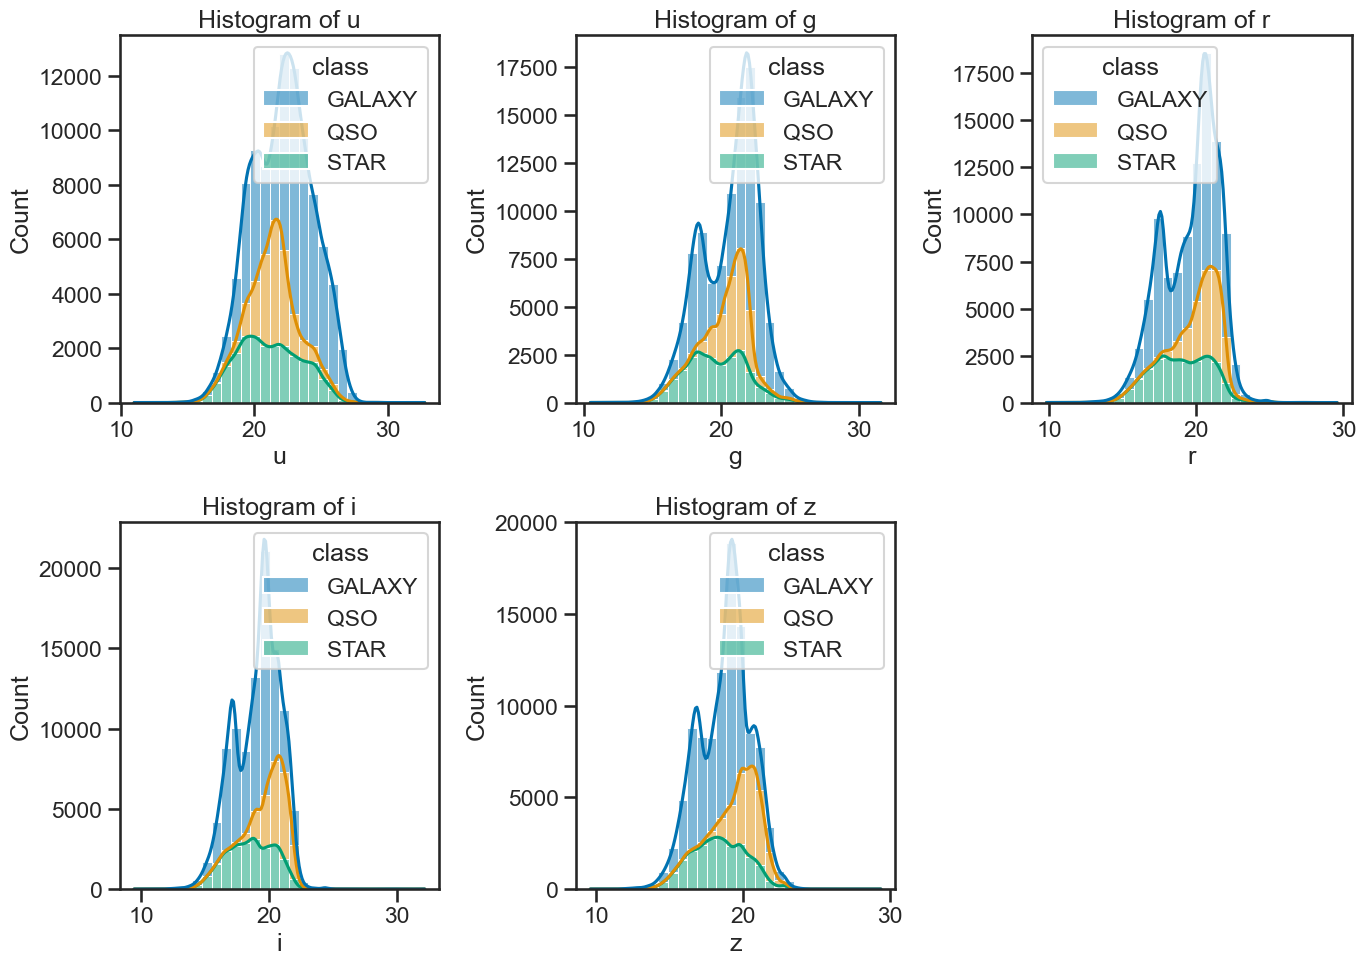

In [4]:
# create subplots
fig, axes = plt.subplots(2, 3, figsize=(14, 10))

# use seaborn to plot histograms of u, g, r, i, z
# include the class as hue
# and use kde for density estimation
sns.histplot(data=df_stellar, x='u', hue='class', multiple='stack', ax=axes[0, 0], bins=30, kde=True)
sns.histplot(data=df_stellar, x='g', hue='class', multiple='stack', ax=axes[0, 1], bins=30, kde=True)
sns.histplot(data=df_stellar, x='r', hue='class', multiple='stack', ax=axes[0, 2], bins=30, kde=True)
sns.histplot(data=df_stellar, x='i', hue='class', multiple='stack', ax=axes[1, 0], bins=30, kde=True)
sns.histplot(data=df_stellar, x='z', hue='class', multiple='stack', ax=axes[1, 1], bins=30, kde=True)

axes[1, 2].axis('off')  # Hide the empty subplot

# set titles for each subplot
axes[0, 0].set_title('Histogram of u')
axes[0, 1].set_title('Histogram of g')
axes[0, 2].set_title('Histogram of r')
axes[1, 0].set_title('Histogram of i')
axes[1, 1].set_title('Histogram of z')

plt.tight_layout()
plt.show()

### Bias in your data?

/var/folders/qv/mnq6bff11kbfx3jwqvl1w12m0000gn/T/ipykernel_17140/1844232811.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels([f"{cls}\n({percentages[cls]:.1f}%)" for cls in class_counts.index])
/var/folders/qv/mnq6bff11kbfx3jwqvl1w12m0000gn/T/ipykernel_17140/1844232811.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels([f"{label}\n({percentages_no_galaxy[label]:.1f}%)" for label in tick_labels])


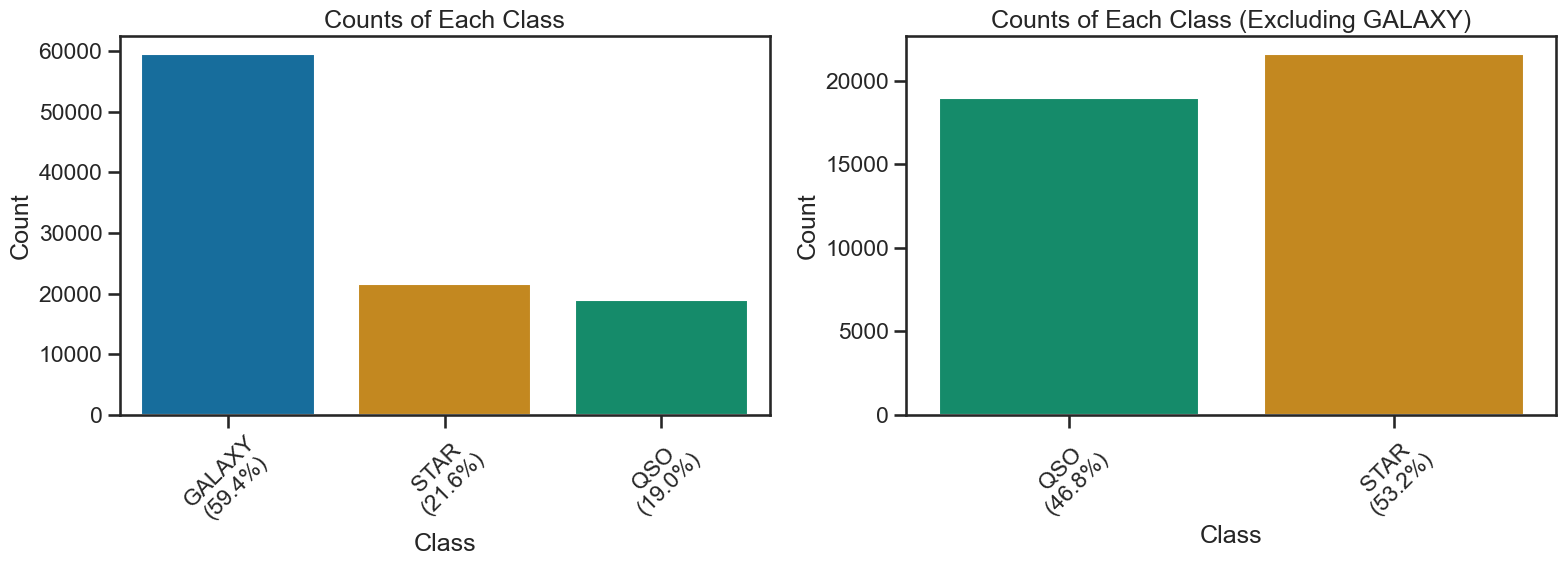

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# All classes
class_counts = df_stellar['class'].value_counts()
percentages = df_stellar['class'].value_counts(normalize=True) * 100
sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, palette='colorblind', legend=False, ax=axs[0])
axs[0].set_xticklabels([f"{cls}\n({percentages[cls]:.1f}%)" for cls in class_counts.index])
axs[0].set_title('Counts of Each Class')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

# Excluding GALAXY
df_no_galaxies = df_stellar[df_stellar['class'] != 'GALAXY']
percentages_no_galaxy = df_no_galaxies['class'].value_counts(normalize=True) * 100

# Use colorblind palette but skip the reverse order to make sure labels are same as colors in both plots
palette_no_galaxy = sns.color_palette('colorblind')[2:0:-1]

ax2 = sns.countplot(x='class', data=df_no_galaxies, hue='class', palette=palette_no_galaxy, ax=axs[1], legend=False)
tick_labels = [tick.get_text() for tick in ax2.get_xticklabels()]
ax2.set_xticklabels([f"{label}\n({percentages_no_galaxy[label]:.1f}%)" for label in tick_labels])
ax2.set_title('Counts of Each Class (Excluding GALAXY)')
ax2.set_xlabel('Class')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

---
## 2. The 2 Class Problem - Modeling Without Redshift

In [90]:
## Import necessary libraries for the classification model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features  and target variable
X = df_no_galaxies[['u', 'g', 'r', 'i', 'z']]
y = df_no_galaxies['class']


### Train-Test Split


In [91]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### Scaling the Data

In [92]:

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### K-Nearest Neighbors Classifier

In [93]:

# Create and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test_scaled)

### The Classification Report

In [94]:
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         QSO       0.86      0.86      0.86      3792
        STAR       0.88      0.88      0.88      4319

    accuracy                           0.87      8111
   macro avg       0.87      0.87      0.87      8111
weighted avg       0.87      0.87      0.87      8111



### The Confusion Matrix

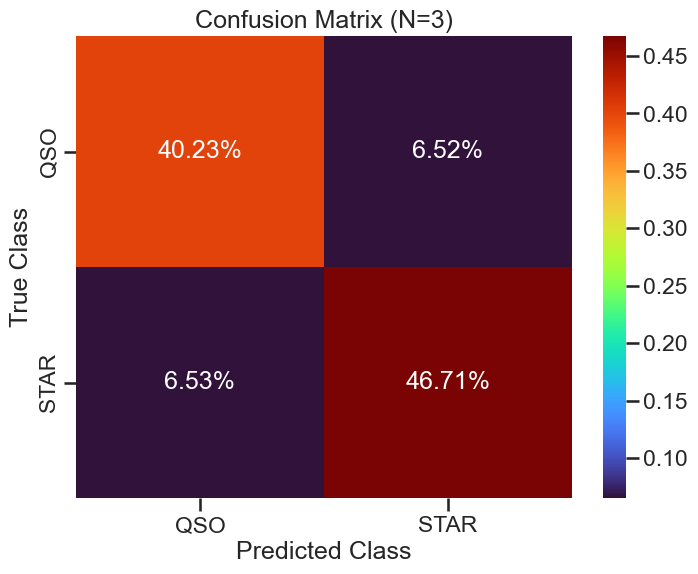

In [95]:
conf_matrix = confusion_matrix(y_test, y_pred)

def plot_confusion_matrix(conf_matrix, classes, N=0, filename=None):
    plt.figure(figsize=(8, 6))
    conf_matrix_prop = conf_matrix / conf_matrix.sum()
    sns.heatmap(conf_matrix_prop, annot=True, fmt='.2%', cmap='turbo',
                xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix (N={N})')
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

plot_confusion_matrix(conf_matrix, knn_classifier.classes_, 3, './figures/confusion_matrix_knn_n3.png')

### Plotting Codes

In [96]:
def get_classification_dfs(X_test, y_test, y_pred):
    """
    Create DataFrames for correctly and misclassified points.

    Parameters
    ----------
    X_test : pd.DataFrame
        Test set features.
    y_test : pd.Series or np.ndarray
        True class labels for the test set.
    y_pred : np.ndarray
        Predicted class labels for the test set.

    Returns
    -------
    df : pd.DataFrame
        DataFrame with test features, true class, and predicted class.
    misclassified : pd.DataFrame
        DataFrame with only misclassified samples.
    """
    df = X_test.copy()
    df['true_class'] = y_test
    df['predicted_class'] = y_pred
    misclassified = df[df['true_class'] != df['predicted_class']]
    return df, misclassified

def get_axis_limits(df, X_test):
    """
    Get axis limits for u and g columns for plotting.

    Parameters
    ----------
    df : pd.DataFrame
        Full DataFrame (for min/max reference).
    X_test : pd.DataFrame
        Test set features.

    Returns
    -------
    u_min, u_max, g_min, g_max : float
        Minimum and maximum values for u and g axes.
    """
    u_min = min(df['u'].min(), X_test['u'].min())
    u_max = max(df['u'].max(), X_test['u'].max())
    g_min = min(df['g'].min(), X_test['g'].min())
    g_max = max(df['g'].max(), X_test['g'].max())
    return u_min, u_max, g_min, g_max

def plot_actual_results(ax, df, palette, class_order, u_min, u_max, g_min, g_max):
    """
    Plot actual class distribution in u vs g space.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        The axes to plot on.
    df : pd.DataFrame
        DataFrame containing the data.
    palette : dict
        Color palette for classes.
    class_order : list
        Order of classes for legend.
    u_min, u_max, g_min, g_max : float
        Axis limits.
    """
    sns.scatterplot(
        x='u', y='g', hue='class', data=df,
        alpha=0.9, s=3, palette=palette, ax=ax, hue_order=class_order
    )
    ax.set_title('Actual Results: u vs g')
    ax.set_xlabel('u')
    ax.set_ylabel('g')
    ax.legend(title='Class', loc='upper left', markerscale=8)
    ax.set_xlim(u_min, u_max)
    ax.set_ylim(g_min, g_max)

def plot_predicted_results(ax, X_test, y_pred, palette, class_order, u_min, u_max, g_min, g_max):
    """
    Plot predicted class distribution in u vs g space.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        The axes to plot on.
    X_test : pd.DataFrame
        Test set features.
    y_pred : np.ndarray or pd.Series
        Predicted class labels.
    palette : dict
        Color palette for classes.
    class_order : list
        Order of classes for legend.
    u_min, u_max, g_min, g_max : float
        Axis limits.
    """
    sns.scatterplot(
        x=X_test['u'], y=X_test['g'], hue=y_pred,
        alpha=0.9, s=3, palette=palette, ax=ax, hue_order=class_order
    )
    ax.set_title('KNN Predicted Class: u vs g')
    ax.set_xlabel('u')
    ax.set_ylabel('g')
    ax.legend(title='Predicted Class', loc='upper left', markerscale=8)
    ax.set_xlim(u_min, u_max)
    ax.set_ylim(g_min, g_max)

def plot_misclassified(ax, correctly_classified_df, misclassified_df, palette, class_order, u_min, u_max, g_min, g_max):
    """
    Plot correctly and misclassified points in u vs g space.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        The axes to plot on.
    correctly_classified_df : pd.DataFrame
        DataFrame of all test points with true and predicted class.
    misclassified_df : pd.DataFrame
        DataFrame of misclassified points.
    palette : dict
        Color palette for classes.
    class_order : list
        Order of classes for legend.
    u_min, u_max, g_min, g_max : float
        Axis limits.
    """
    correct_counts = correctly_classified_df[
        correctly_classified_df['true_class'] == correctly_classified_df['predicted_class']
    ]['predicted_class'].value_counts()
    for cls in class_order:
        cls_mask = (correctly_classified_df['predicted_class'] == cls) & (correctly_classified_df['true_class'] == cls)
        sns.scatterplot(
            x=correctly_classified_df.loc[cls_mask, 'u'],
            y=correctly_classified_df.loc[cls_mask, 'g'],
            color=palette[cls],
            label=f"{cls} (N={correct_counts.get(cls, 0)})",
            ax=ax, alpha=0.5, s=3
        )
    sns.scatterplot(
        x=misclassified_df['u'], y=misclassified_df['g'],
        color='red', label=f"Misclassified (N={len(misclassified_df)})", ax=ax, alpha=0.9, s=3
    )
    ax.set_title('Misclassified Points in Red')
    ax.set_xlabel('u')
    ax.set_ylabel('g')
    ax.legend(title='Class', loc='upper left', markerscale=8)
    ax.set_xlim(u_min, u_max)
    ax.set_ylim(g_min, g_max)

def plot_classification_results(
    df_no_galaxies, X_test, y_pred, correctly_classified_df, misclassified_df,
    u_min, u_max, g_min, g_max, filename=None
):
    """
    Plot actual, predicted, and misclassified results side by side.

    Parameters
    ----------
    df_no_galaxies : pd.DataFrame
        DataFrame of all data without galaxies.
    X_test : pd.DataFrame
        Test set features.
    y_pred : np.ndarray or pd.Series
        Predicted class labels.
    correctly_classified_df : pd.DataFrame
        DataFrame of all test points with true and predicted class.
    misclassified_df : pd.DataFrame
        DataFrame of misclassified points.
    u_min, u_max, g_min, g_max : float
        Axis limits.
    filename : str or None, optional
        If provided, save the figure to this file.
    """
    fig, axs = plt.subplots(3, 1, figsize=(10, 30))
    class_order = ['STAR', 'QSO']
    palette = dict(zip(class_order, sns.color_palette('colorblind', n_colors=2)))
    plot_actual_results(axs[0], df_no_galaxies, palette, class_order, u_min, u_max, g_min, g_max)
    plot_predicted_results(axs[1], X_test, y_pred, palette, class_order, u_min, u_max, g_min, g_max)
    plot_misclassified(axs[2], correctly_classified_df, misclassified_df, palette, class_order, u_min, u_max, g_min, g_max)
    plt.tight_layout()
    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

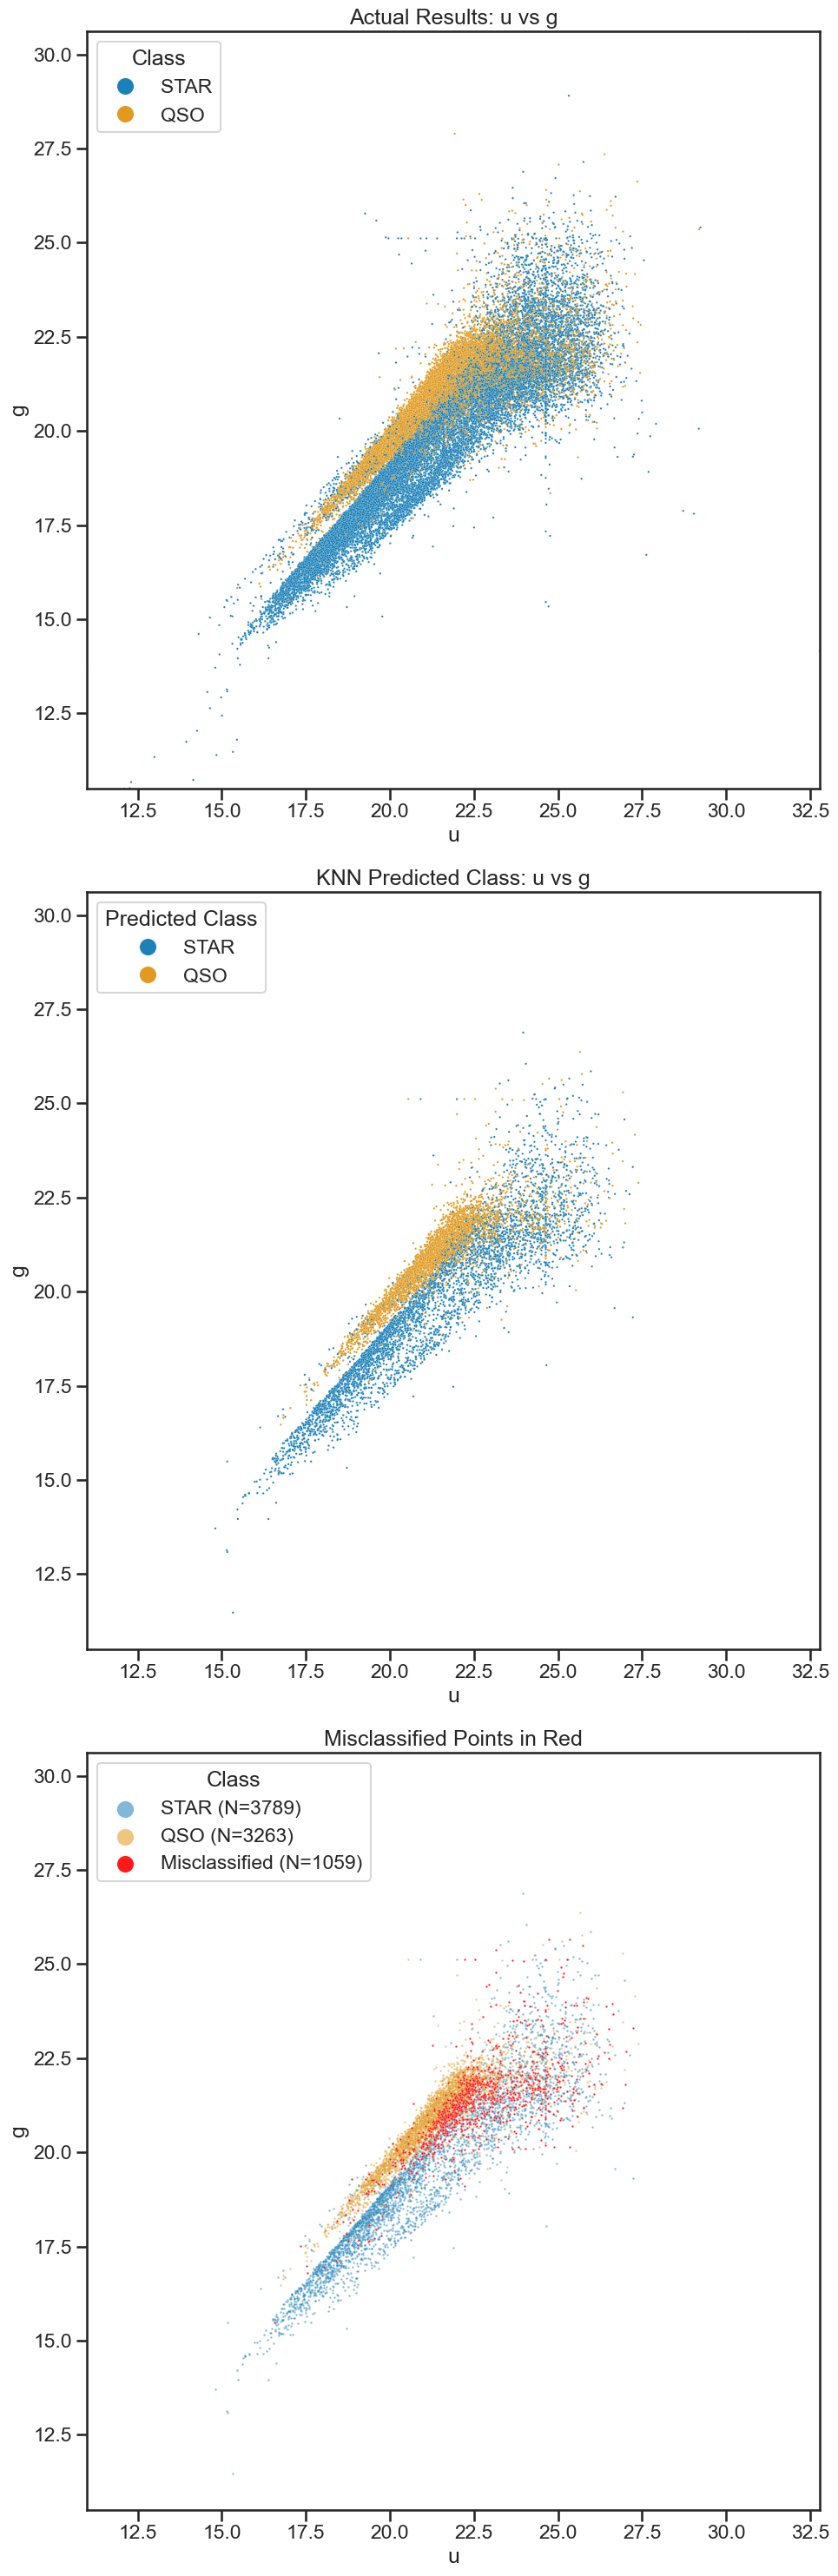

In [97]:
# Prepare data for plotting
correctly_classified_df, misclassified_df = get_classification_dfs(X_test, y_test, y_pred)
u_min, u_max, g_min, g_max = get_axis_limits(df_no_galaxies, X_test)

# Call the modular plotting function
plot_classification_results(df_no_galaxies, X_test, y_pred, correctly_classified_df, misclassified_df, u_min, u_max, g_min, g_max, filename='./figures/classification_results_knn_n3.png')

### Performance Across Different Values of K

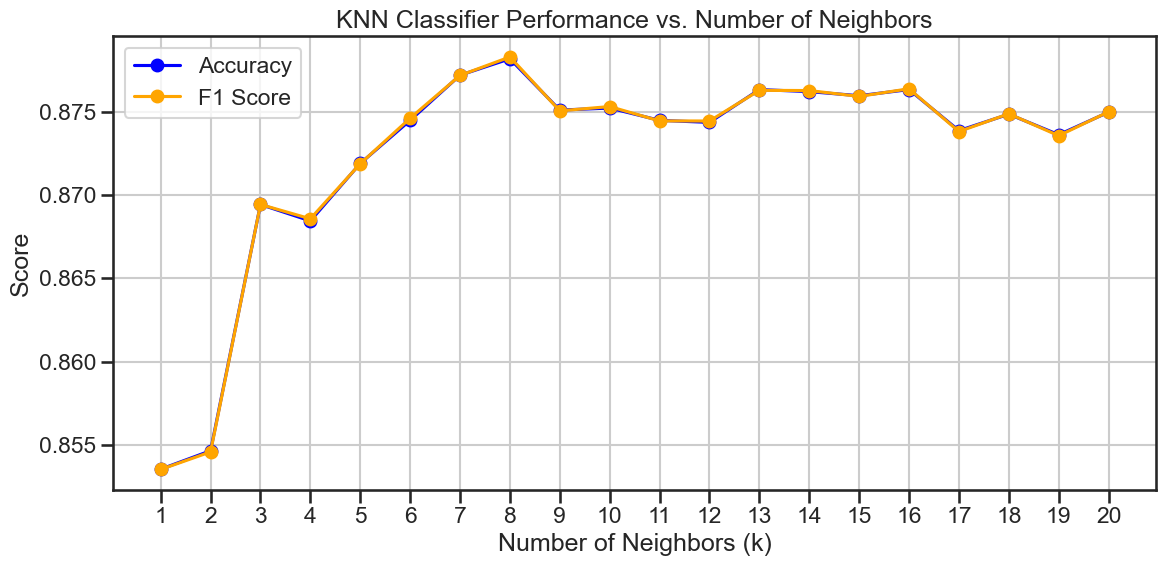

In [61]:
def knn_performance_vs_neighbors(X_train_scaled, y_train, X_test_scaled, y_test, k_range=range(1, 21)):
    from sklearn.metrics import accuracy_score, f1_score
    accuracies = []
    f1_scores = []
    for k in k_range:
        knn_classifier = KNeighborsClassifier(n_neighbors=k)
        knn_classifier.fit(X_train_scaled, y_train)
        y_pred = knn_classifier.predict(X_test_scaled)
        accuracies.append(accuracy_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    return list(k_range), accuracies, f1_scores

def plot_knn_performance(neighbors, accuracies, f1_scores, filename=None):
    plt.figure(figsize=(12, 6))
    plt.plot(neighbors, accuracies, marker='o', label='Accuracy', color='blue')
    plt.plot(neighbors, f1_scores, marker='o', label='F1 Score', color='orange')
    plt.title('KNN Classifier Performance vs. Number of Neighbors')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Score')
    plt.xticks(neighbors)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

neighbors, accuracies, f1_scores = knn_performance_vs_neighbors(X_train_scaled, y_train, X_test_scaled, y_test)
plot_knn_performance(neighbors, accuracies, f1_scores, './figures/knn_performance_vs_neighbors.png')

### Does K=9 Perform Much Better?

              precision    recall  f1-score   support

         QSO       0.87      0.86      0.87      3792
        STAR       0.88      0.89      0.88      4319

    accuracy                           0.88      8111
   macro avg       0.87      0.87      0.87      8111
weighted avg       0.88      0.88      0.88      8111



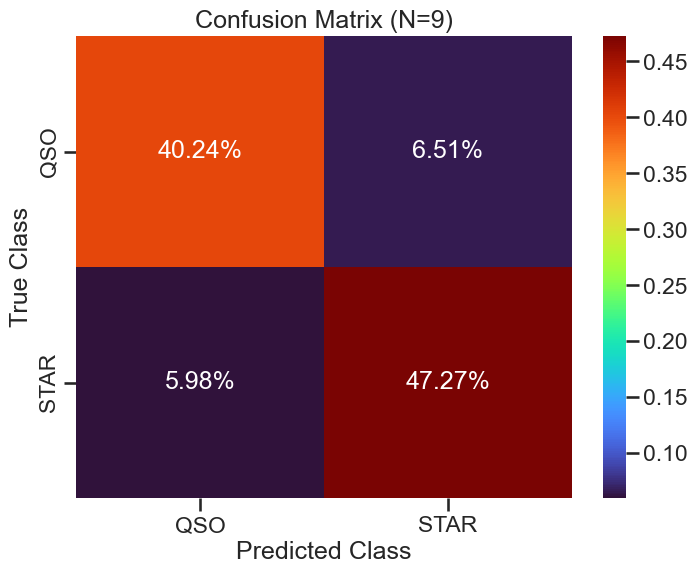

In [62]:
# Create and train the KNN classifier with k=9
knn_classifier = KNeighborsClassifier(n_neighbors=9)
knn_classifier.fit(X_train_scaled, y_train)
y_pred = knn_classifier.predict(X_test_scaled)

# Print the classification report
print(classification_report(y_test, y_pred))

# Plot the confusion matrix using the modular function
conf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_matrix, knn_classifier.classes_, 9, './figures/confusion_matrix_knn_n9.png')

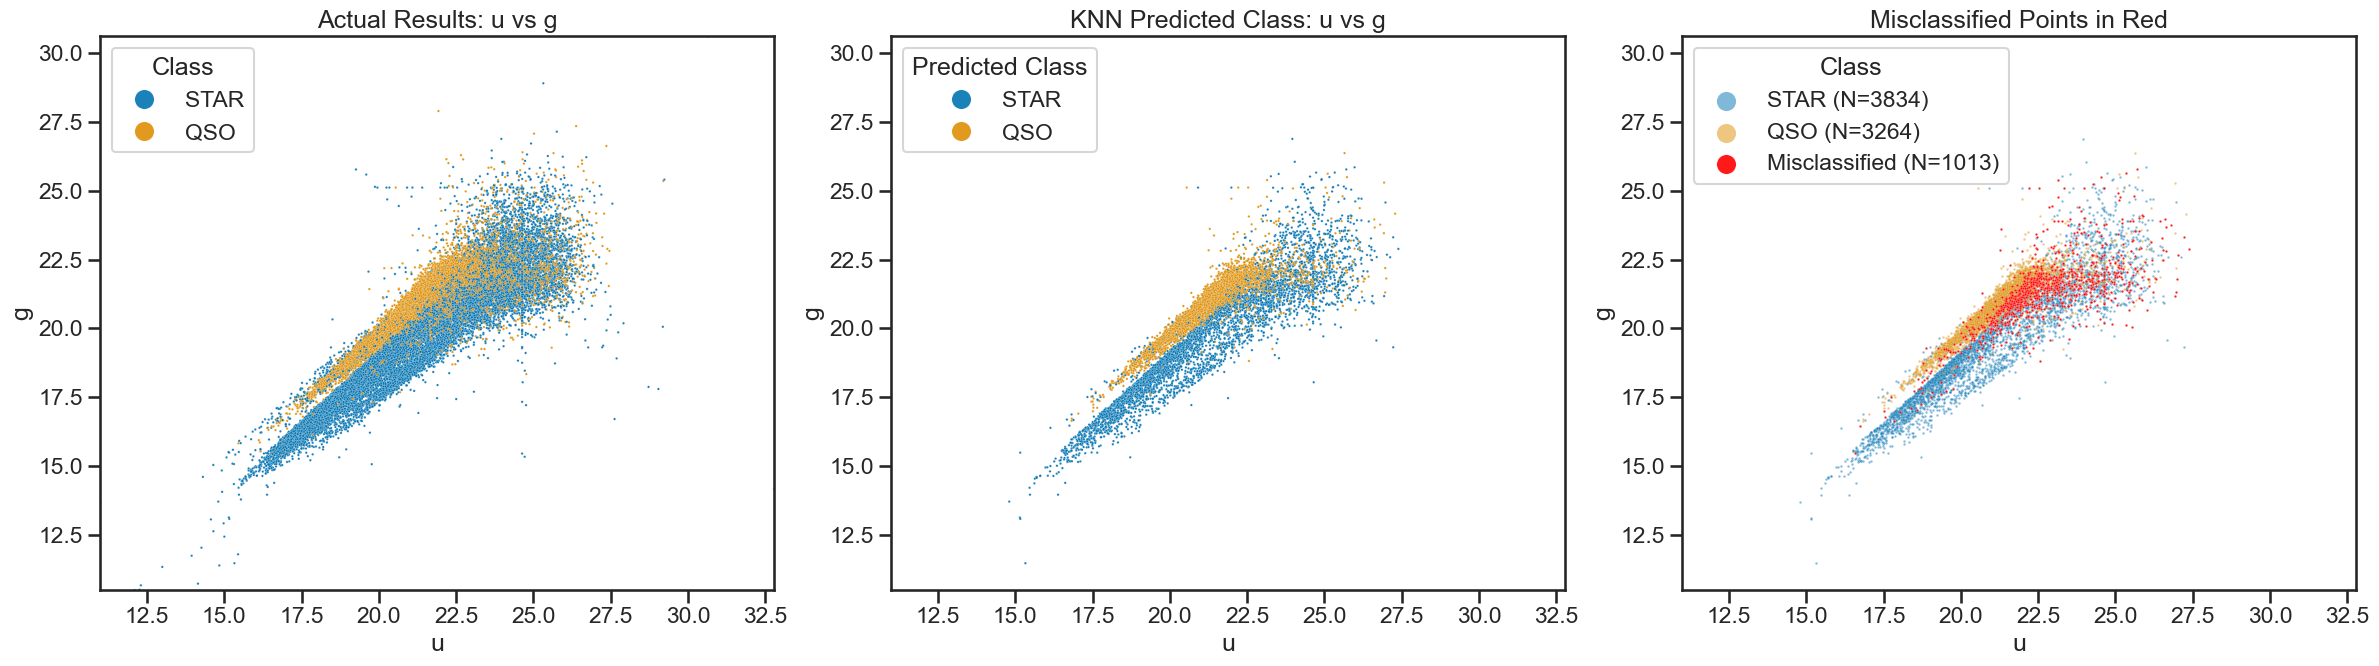

In [63]:
# Prepare data for plotting
correctly_classified_df, misclassified_df = get_classification_dfs(X_test, y_test, y_pred)
u_min, u_max, g_min, g_max = get_axis_limits(df_no_galaxies, X_test)

# Call the modular plotting function
plot_classification_results(df_no_galaxies, X_test, y_pred, correctly_classified_df, misclassified_df, u_min, u_max, g_min, g_max,filename='./figures/classification_results_knn_n9.png')

---
## 3. The 2 Class Problem - Modeling With Redshift

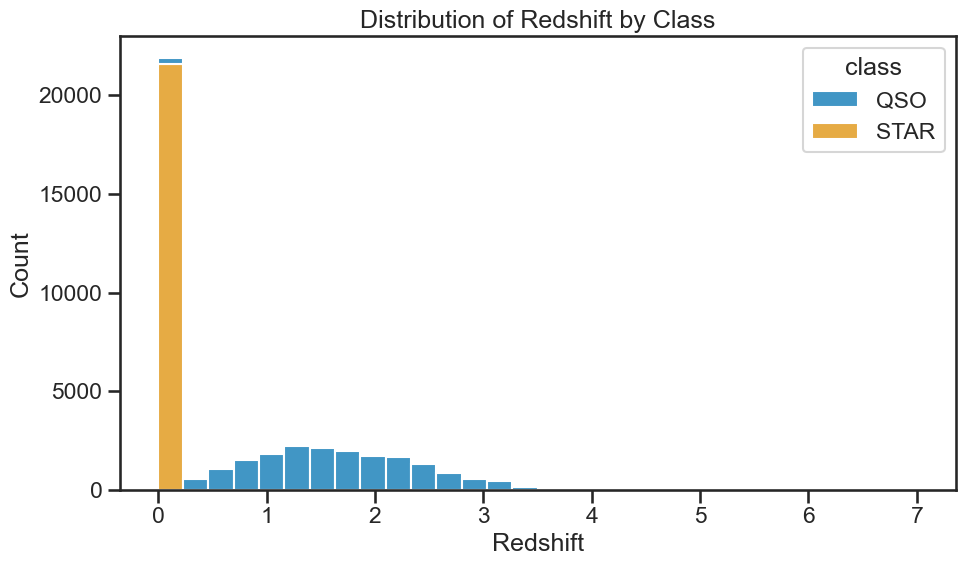

In [64]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_no_galaxies, x='redshift', hue='class', multiple='stack', bins=30)
plt.title('Distribution of Redshift by Class')
plt.xlabel('Redshift')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('./figures/histogram_redshift_by_class.png', dpi=300, bbox_inches='tight')
plt.show()

### Build, Train, and Evaluate the Model

              precision    recall  f1-score   support

         QSO       1.00      0.99      0.99      3792
        STAR       0.99      1.00      0.99      4319

    accuracy                           0.99      8111
   macro avg       0.99      0.99      0.99      8111
weighted avg       0.99      0.99      0.99      8111



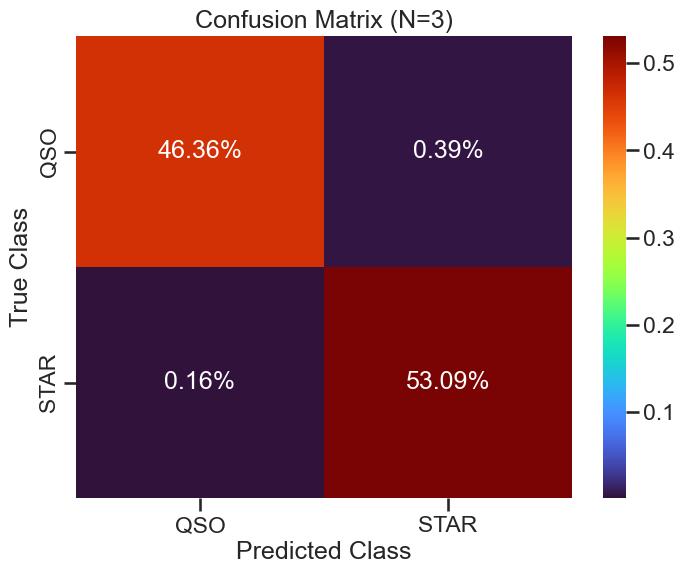

In [65]:
# Define features  and target variable
X = df_no_galaxies[['u', 'g', 'r', 'i', 'z','redshift']]
y = df_no_galaxies['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_scaled, y_train)

# Evaluate the model

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test_scaled)

# Print the classification report
print(classification_report(y_test, y_pred))

# Plot the confusion matrix using the modular function
conf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_matrix, knn_classifier.classes_, 3, './figures/confusion_matrix_knn_w_redshift_n3.png')

### Performance Across Different Values of K

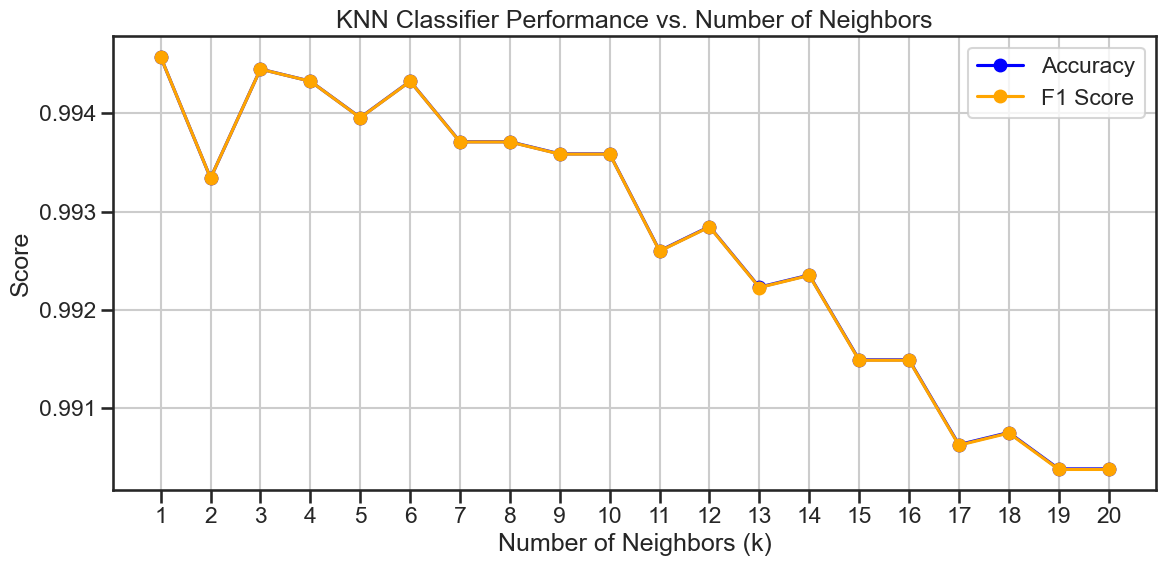

In [66]:
neighbors, accuracies, f1_scores = knn_performance_vs_neighbors(X_train_scaled, y_train, X_test_scaled, y_test)
plot_knn_performance(neighbors, accuracies, f1_scores, './figures/knn_w_redshit_performance_vs_neighbors.png')

---
## 4. Cross Validation

In [67]:
# Perform cross-validation on the KNN classifier with k=9
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5, scoring='accuracy')
cv_f1_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5, scoring='f1_weighted')

print("Cross-validation scores (accuracy):", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation of accuracy:", cv_scores.std())

print("Cross-validation F1 scores:", cv_f1_scores)
print("Mean F1 score:", cv_f1_scores.mean())
print("Standard deviation of F1 score:", cv_f1_scores.std())

Cross-validation scores (accuracy): [0.98859609 0.99090769 0.99244876 0.99352651 0.98890259]
Mean accuracy: 0.9908763269872054
Standard deviation of accuracy: 0.0019283226121888709
Cross-validation F1 scores: [0.9885924  0.99090336 0.99244553 0.99352457 0.98889874]
Mean F1 score: 0.9908729203256218
Standard deviation of F1 score: 0.0019289072098044298


### Checking the Model's Performance For Different Values of K

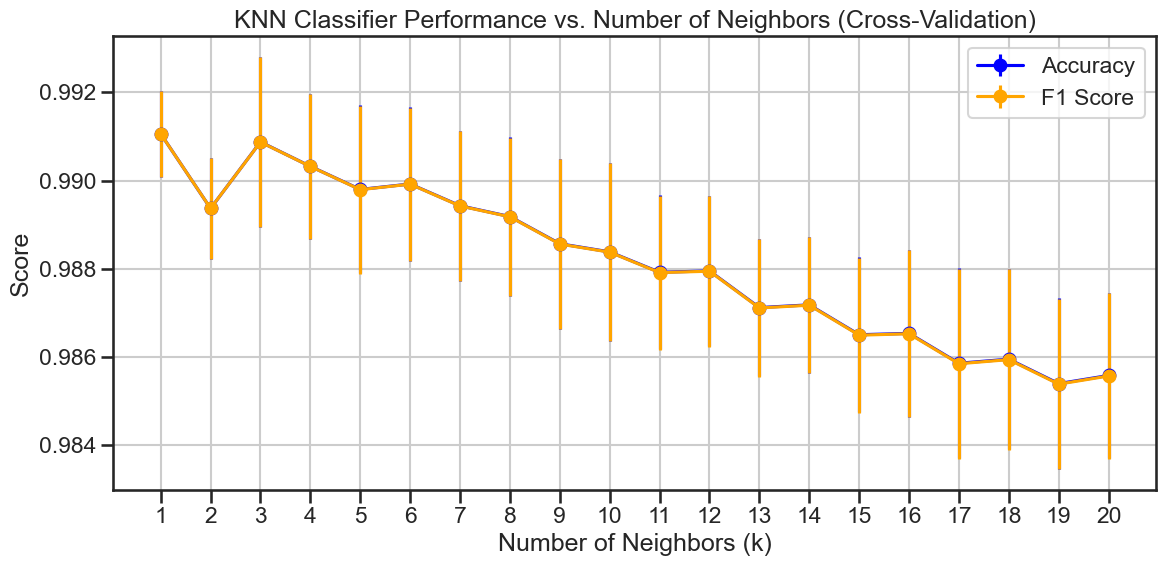

In [78]:
# Import cross_val_score for cross-validation
from sklearn.model_selection import cross_val_score

def knn_crossval_performance_vs_neighbors(X_train, y_train, k_range=range(1, 21), cv=5):
    """
    Evaluate KNN performance using cross-validation for different values of k.

    Parameters
    ----------
    X_train : pd.DataFrame or np.ndarray
        Training features.
    y_train : pd.Series or np.ndarray
        Training labels.
    k_range : range, optional
        Range of k (number of neighbors) to test.
    cv : int, optional
        Number of cross-validation folds.

    Returns
    -------
    neighbors : list
        List of k values tested.
    cv_accuracies : list
        Mean cross-validated accuracy for each k.
    cv_accuracies_std : list
        Standard deviation of accuracy for each k.
    cv_f1_scores : list
        Mean cross-validated F1 score for each k.
    cv_f1_scores_std : list
        Standard deviation of F1 score for each k.
    """
    cv_accuracies = []
    cv_f1_scores = []
    cv_accuracies_std = []
    cv_f1_scores_std = []
    # Loop over each k value
    for k in k_range:
        # Create a KNN classifier with k neighbors
        knn_classifier = KNeighborsClassifier(n_neighbors=k)
        # Perform cross-validation for accuracy
        cv_accuracy = cross_val_score(
            knn_classifier, X_train, y_train, cv=cv, scoring='accuracy'
        )
        # Perform cross-validation for weighted F1 score
        cv_f1 = cross_val_score(
            knn_classifier, X_train, y_train, cv=cv, scoring='f1_weighted'
        )
        # Store mean and std of scores
        cv_accuracies.append(cv_accuracy.mean())
        cv_accuracies_std.append(cv_accuracy.std())
        cv_f1_scores.append(cv_f1.mean())
        cv_f1_scores_std.append(cv_f1.std())
    return (
        list(k_range),
        cv_accuracies,
        cv_accuracies_std,
        cv_f1_scores,
        cv_f1_scores_std,
    )

def plot_knn_crossval_performance(
    neighbors, accuracies, accuracies_std, f1_scores, f1_scores_std, filename=None
):
    """
    Plot KNN cross-validated accuracy and F1 score vs. number of neighbors.

    Parameters
    ----------
    neighbors : list
        List of k values.
    accuracies : list
        Mean accuracy for each k.
    accuracies_std : list
        Standard deviation of accuracy for each k.
    f1_scores : list
        Mean F1 score for each k.
    f1_scores_std : list
        Standard deviation of F1 score for each k.
    filename : str or None, optional
        If provided, save the plot to this file.
    """
    plt.figure(figsize=(12, 6))
    # Plot accuracy with error bars
    plt.errorbar(
        neighbors, accuracies, yerr=accuracies_std,
        label='Accuracy', marker='o', color='blue'
    )
    # Plot F1 score with error bars
    plt.errorbar(
        neighbors, f1_scores, yerr=f1_scores_std,
        label='F1 Score', marker='o', color='orange'
    )
    plt.title('KNN Classifier Performance vs. Number of Neighbors (Cross-Validation)')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Score')
    plt.xticks(neighbors)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    # Save figure if filename is provided
    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

# Run cross-validation for k=1 to 20 and plot results
neighbors, cv_accuracies, cv_accuracies_std, cv_f1_scores, cv_f1_scores_std = knn_crossval_performance_vs_neighbors(X_train, y_train)
plot_knn_crossval_performance(
    neighbors, cv_accuracies, cv_accuracies_std, cv_f1_scores, cv_f1_scores_std,
    './figures/knn_performance_vs_neighbors_crossval.png'
)

---
## 5. The Three Class Problem - Modeling with Redshift

In [46]:
df_stellar['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

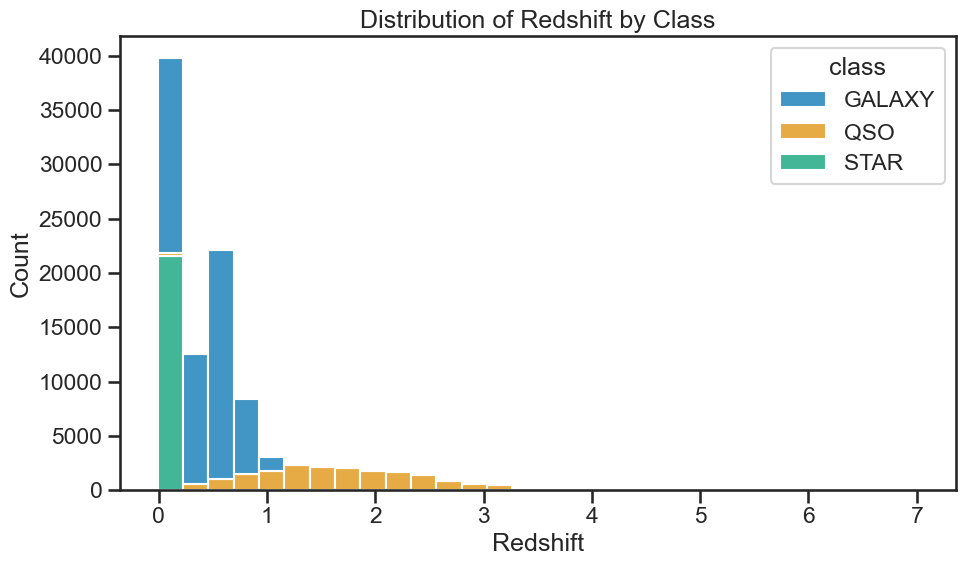

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_stellar, x='redshift', hue='class', multiple='stack', bins=30)
plt.title('Distribution of Redshift by Class')
plt.xlabel('Redshift')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('./figures/3_object_histogram_redshift_by_class.png', dpi=300, bbox_inches='tight')
plt.show()

### Build, Train, and Evaluate the Model

              precision    recall  f1-score   support

      GALAXY       0.97      0.97      0.97     11889
         QSO       0.96      0.93      0.94      3792
        STAR       0.94      0.98      0.96      4319

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000



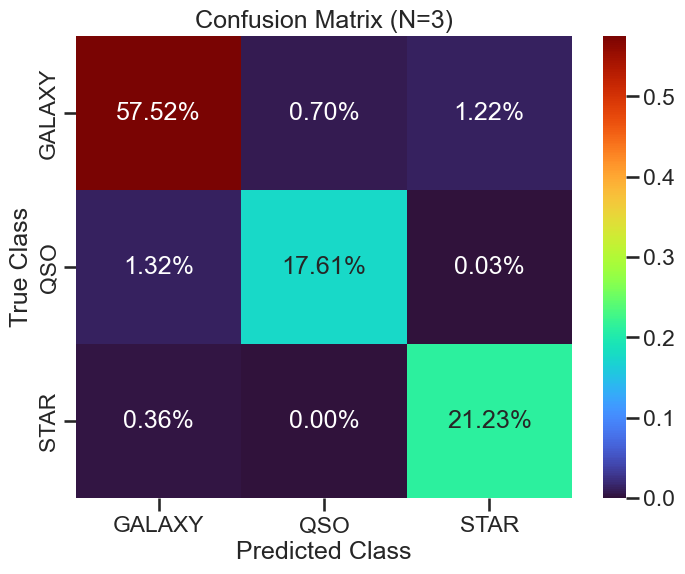

In [83]:
# Define features  and target variable
X = df_stellar[['u', 'g', 'r', 'i', 'z','redshift']]
y = df_stellar['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_scaled, y_train)

# Evaluate the model
# Make predictions on the test set
y_pred = knn_classifier.predict(X_test_scaled)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print and plot the confusion matrix using the modular function
conf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_matrix, knn_classifier.classes_, 3, './figures/3_object_confusion_matrix_knn_w_redshift_n3.png')

### Updated Plotting Codes (3 Classes)

In [88]:
def plot_actual_results(ax, df, palette, class_order, u_min, u_max, g_min, g_max):
    sns.scatterplot(
        x='u', y='g', hue='class', data=df,
        alpha=0.9, s=3, palette=palette, ax=ax, hue_order=class_order
    )
    ax.set_title('Actual Results: u vs g')
    ax.set_xlabel('u')
    ax.set_ylabel('g')
    ax.legend(title='Class', loc='upper left', markerscale=8)
    ax.set_xlim(u_min, u_max)
    ax.set_ylim(g_min, g_max)

def plot_predicted_results(ax, X_test, y_pred, palette, class_order, u_min, u_max, g_min, g_max):
    sns.scatterplot(
        x=X_test['u'], y=X_test['g'], hue=y_pred,
        alpha=0.9, s=3, palette=palette, ax=ax, hue_order=class_order
    )
    ax.set_title('KNN Predicted Class: u vs g')
    ax.set_xlabel('u')
    ax.set_ylabel('g')
    ax.legend(title='Predicted Class', loc='upper left', markerscale=8)
    ax.set_xlim(u_min, u_max)
    ax.set_ylim(g_min, g_max)

def plot_misclassified(ax, correctly_classified_df, misclassified_df, palette, class_order, u_min, u_max, g_min, g_max):
    correct_counts = correctly_classified_df[correctly_classified_df['true_class'] == correctly_classified_df['predicted_class']]['predicted_class'].value_counts()
    for cls in class_order:
        cls_mask = (correctly_classified_df['predicted_class'] == cls) & (correctly_classified_df['true_class'] == cls)
        sns.scatterplot(
            x=correctly_classified_df.loc[cls_mask, 'u'],
            y=correctly_classified_df.loc[cls_mask, 'g'],
            color=palette[cls],
            label=f"{cls} (N={correct_counts.get(cls, 0)})",
            ax=ax, alpha=0.9, s=3
        )
    sns.scatterplot(
        x=misclassified_df['u'], y=misclassified_df['g'],
        color='red', label=f"Misclassified (N={len(misclassified_df)})", ax=ax, alpha=0.9, s=3
    )
    ax.set_title('Misclassified Points in Red')
    ax.set_xlabel('u')
    ax.set_ylabel('g')
    ax.legend(title='Class', loc='upper left', markerscale=8)
    ax.set_xlim(u_min, u_max)
    ax.set_ylim(g_min, g_max)

def plot_classification_results(df_no_galaxies, X_test, y_pred, correctly_classified_df, misclassified_df, u_min, u_max, g_min, g_max, filename=None):
    fig, axs = plt.subplots(3, 1, figsize=(10, 30))
    class_order = ['STAR', 'QSO','GALAXY']
    palette = dict(zip(class_order, sns.color_palette('colorblind', n_colors=3)))
    plot_actual_results(axs[0], df_no_galaxies, palette, class_order, u_min, u_max, g_min, g_max)
    plot_predicted_results(axs[1], X_test, y_pred, palette, class_order, u_min, u_max, g_min, g_max)
    plot_misclassified(axs[2], correctly_classified_df, misclassified_df, palette, class_order, u_min, u_max, g_min, g_max)
    plt.tight_layout()
    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

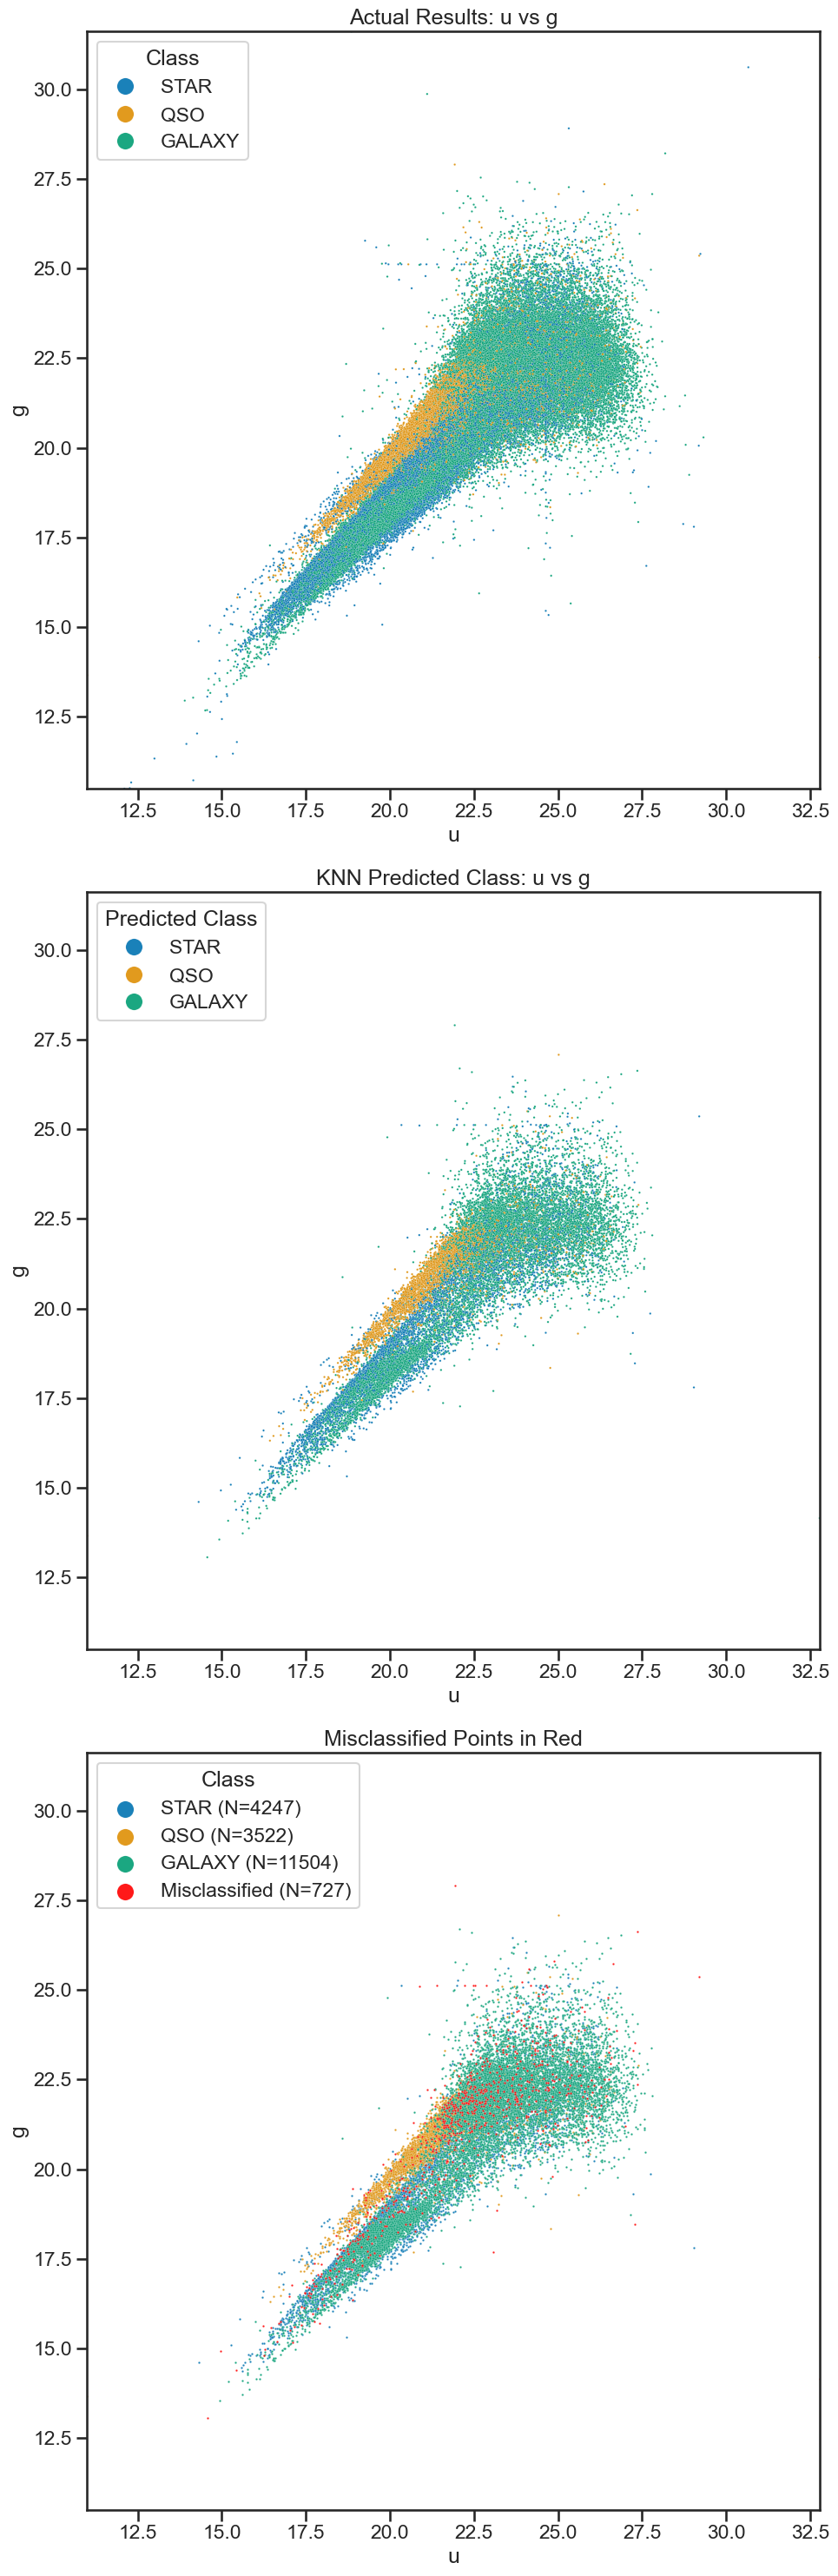

In [89]:
# Prepare data for plotting
correctly_classified_df, misclassified_df = get_classification_dfs(X_test, y_test, y_pred)
u_min, u_max, g_min, g_max = get_axis_limits(df_stellar, X_test)
# Call the modular plotting function
plot_classification_results(df_stellar, X_test, y_pred, correctly_classified_df, misclassified_df, u_min, u_max, g_min, g_max, filename='./figures/3_object_classification_results_knn_w_redshift_n3.png')

### Quick Cross Validation Check

In [77]:
# Perform cross-validation on the KNN classifier with k=3
cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5, scoring='accuracy')
cv_f1_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5, scoring='f1_weighted')
print("Cross-validation scores (accuracy):", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation of accuracy:", cv_scores.std())
print("Cross-validation F1 scores:", cv_f1_scores)
print("Mean F1 score:", cv_f1_scores.mean())
print("Standard deviation of F1 score:", cv_f1_scores.std())

Cross-validation scores (accuracy): [0.98859609 0.99090769 0.99244876 0.99352651 0.98890259]
Mean accuracy: 0.9908763269872054
Standard deviation of accuracy: 0.0019283226121888709
Cross-validation F1 scores: [0.9885924  0.99090336 0.99244553 0.99352457 0.98889874]
Mean F1 score: 0.9908729203256218
Standard deviation of F1 score: 0.0019289072098044298
